## Finite Differences for Laplace Equation.

Source: [link](https://nbviewer.org/urls/www.numfys.net/media/notebooks/partial_differential_equations_two_examples.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

# Set common figure parameters:
newparams = {'figure.figsize': (16, 6), 'font.size': 20}
plt.rcParams.update(newparams)

In [ ]:
# Set the number of grid points
Nx = 50
dx = 1/(Nx+1)
x = np.linspace(dx, 1, Nx+1)

dy = dx
Ny = int(1/dy - 2)
N = (Nx+1)*(Ny+1)
y = np.linspace(dy, 1-dx, Ny+1)

# Set constants at boundary
ua = 5
ub = 5*(1-np.sin(np.pi*x))
uc = 5

### Construct the matrix A
A = np.zeros([N,N])

for i in range(N):
    # Set the diagonals to -4
    A[i, i] = -4
    # Set the non-zero off-diagonals to 1
    if i > 0:
        A[i, i-1] = 1
    if i < N-1:
        A[i, i+1] = 1
    if i < N-Nx-1:
        A[i+Nx+1, i] = 1
        A[i, i+Nx+1] = 1

for i in range(N):
    # Some elements must be changed to 2 due to the Neumann BCs
    if (i+1)%(Nx+1) == 0:
        A[i,i-1] = 2

    # In addition some elements must be set to zero, since
    # the elements are taken care of by terms in b
    if i > 0 and i < N - 1 and (i+1)%(Nx+1) == 0:
        A[i, i+1] = 0
        A[i+1, i] = 0

### Construct the right hand side vector b:
b = np.zeros(N)

# For j = 0, set elements to -ua
b[0:Nx+1] = - ua

# For i = 0, set the elements to -uc
indices = np.mod(range(N),Nx+1) == 0
b[indices] += -uc

# For j = Ny, set elements to -ub(x_i)
for i in range(Nx+1):
    b[N-Nx-1+i] += -ub[i]


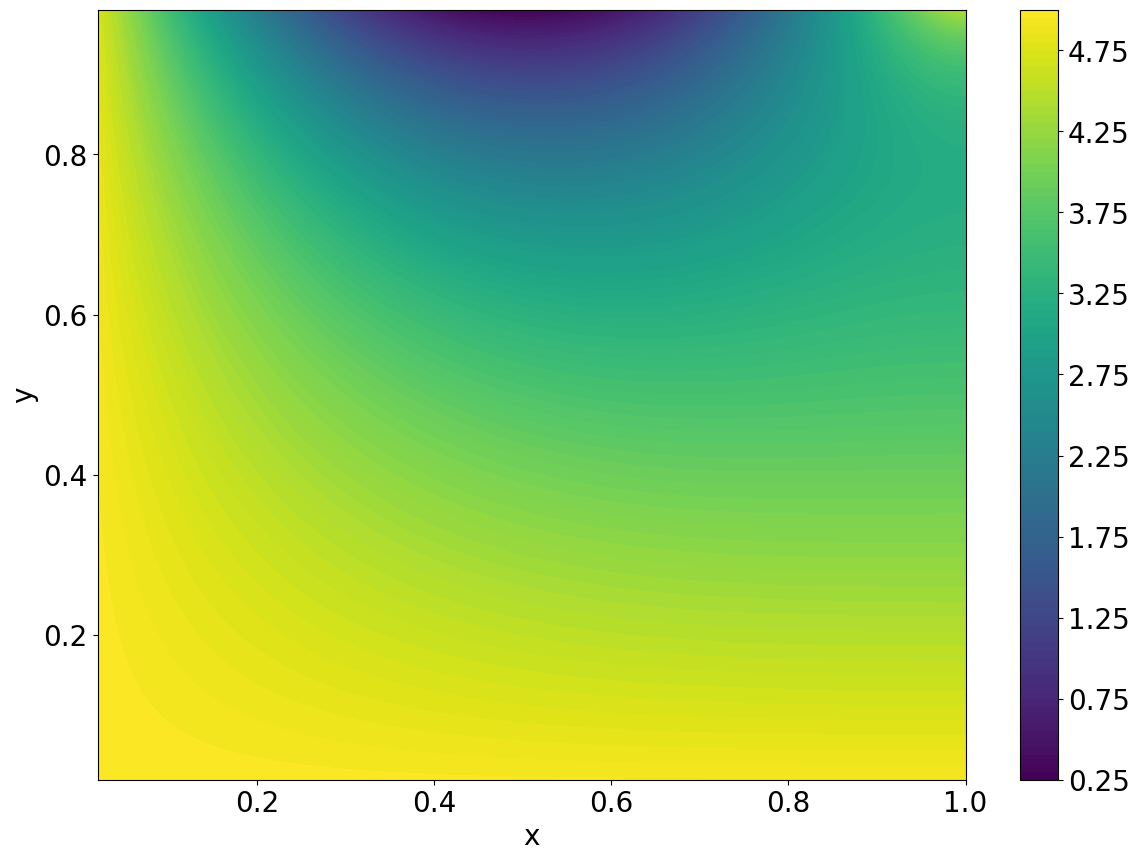

In [ ]:
# Solve the system using linalg
u = linalg.solve(A,b)

# Reshape solution array to be able to plot it
u_ = u.reshape(Ny+1,Nx+1)
plt.figure(figsize=(14, 10))
plt.contourf(x, y, u_, 100)
plt.colorbar()
plt.ylabel('y')
plt.xlabel('x')
plt.show()